In [0]:
! pip install control

     |████████████████████████████████| 256kB 4.9MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=fb903a03802e15a0412234b0da1c28dccb075ab0c026c765e47793bf1d6814b2
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import place_poles
from math import pi, sqrt, sin, cos
from control import root_locus, ss, pole, zero
from scipy.integrate import odeint
from numpy.linalg import eig, pinv, matrix_rank
from scipy import linalg
%matplotlib inline

In [0]:
# matrix results from the previous homework
A = np.array([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [0, 5.92, 0, 0],
              [0, 13.67, 0, 0]])

B = np.array([[0],[0], [0.19], [0.16]])

C = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
D = np.array([0])

time = np.linspace(0,30,3000)


#(C) Luenberger Observer for Linearized System


In [0]:
n = 4     # state matrix size
m = 1    # control input size
eig = [-1.1, -1.2, -1.3, -1.4]

#  pole placement method
pole = place_poles(A.T, C.T, eig)
L_pole = pole.gain_matrix.T
# LQR method
# observation matrix, R and Q are random 
Q_observer = np.eye(n) 
R_observer = np.array([[7, 1], [1, 3]]) 
L_lqr = np.array(np.linalg.inv(R_observer)).dot(C).dot(linalg.solve_continuous_are(A.T, C.T, Q_observer, R_observer)).T


def LTI(x, t, u):
    n = np.dot(A, x) + np.dot(B, u)
    return  n


def LTI_Observer_Pole(x_hat,t, u, x):
  return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_pole, C).dot(x - x_hat)    


def LTI_Observer_LQR(x_hat, t, u, x):
  return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, C).dot(x - x_hat)
  

def draw(x, x_hat, t, title):
  y = np.dot(C, np.array(x).T)
  y_hat = np.dot(C, np.array(x_hat).T)
  fin = np.column_stack((y[0], y[1], y_hat[0], y_hat[1]))
  lines=plt.plot(t, fin)
  plt.xlabel('time')
  plt.ylabel('amplitude')
  plt.title(title)
  plt.legend(lines, ('x', 'θ', 'x_obs','θ_obs')) 

# this is for controller 
# P controller u = Px
pole = place_poles(A, B, eig)
P = -pole.gain_matrix

# initial states
x = [np.random.rand(n)]
x_hat_pole = [np.random.rand(n)]
x_hat_lqr = [np.random.rand(n)]


for i in range(1, len(time)):
    cur_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(LTI, x[-1], cur_time, args=tuple([u]))
    x.append(x_dot[-1])
    
    x_hat_dot = odeint(LTI_Observer_Pole, x_hat_pole[-1], cur_time, args=tuple([u, x[-1]]))
    x_hat_pole.append(x_hat_dot[-1])

    x_hat_dot = odeint(LTI_Observer_LQR, x_hat_lqr[-1], cur_time, args=tuple([u, x[-1]]))
    x_hat_lqr.append(x_hat_dot[-1])

#(E) Simulate Nonlinear System with Luenberger Observer

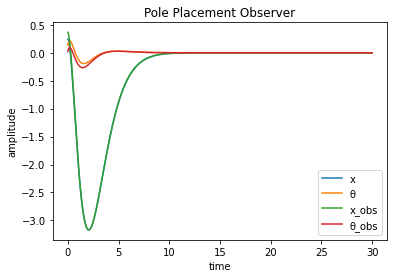

In [0]:
draw(x= x, x_hat = x_hat_pole, t=time, title="Pole Placement Observer")   

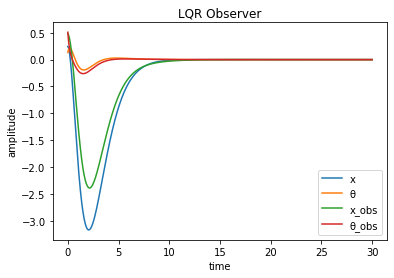

In [0]:
draw(x, x_hat_lqr,  time, "LQR Observer")  

##Results

* Pole Placement Observer has bigger overshoot for x and nearly same overshoot ffor theta comparing with  LQR Observer 

#(D) State Feedback Controller for Linearized System

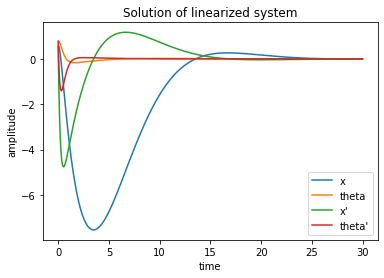

In [30]:
 # Q and R are control matrixes
def lqr(A,B,Q,R):
#solve the ricatti equation
  X = np.matrix(linalg.solve_continuous_are(A, B, Q, R))
# K= LQR gain
# this one if R be square non 1 by 1 matrix 
# K = np.matrix(scipy.linalg.inv(R)*(B.T*X))
  K = pinv(R).dot(np.matrix((B.T*X)))
  eigVals, eigVecs = linalg.eig(A-B*K)
  return K, X, eigVals

def draw_prev(x, t):
  lines=plt.plot(t, x)
  plt.xlabel('time')
  plt.ylabel('amplitude')
  plt.title("Solution of linearized system")
  plt.legend(lines, ('x', 'theta', 'x\'','theta\'' ))  

n = 4     # state matrix size
m = 1    # control input size

Q = np.eye(n)
R = np.eye(m)

k, x, eigs = lqr(A,B, Q, R)

def for_ode_lqr(x, t):
  x= x.reshape((4,1))
  x_new= np.array(A.dot(x)-(B.dot(k)).dot(x))
  x_new = x_new.reshape((4,))
  return x_new

y0=np.random.rand(n)
res = odeint(for_ode_lqr, y0, time)
draw_prev(res, time)

#(F) White Gaussian Noise Addition to the output


In [0]:
from numpy.random import randn

def LTI_Observer_Pole(x_hat,t, u, x):
  return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_pole, dy - np.dot(C, x_hat))
  np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, C).dot(x - x_hat)    


def LTI_Observer_LQR(x_hat, t, u, x):
  return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, dy - np.dot(C, x_hat))


x = [np.random.rand(n)]
x_hat_pole = [np.random.rand(n)]
x_hat_lqr = [np.random.rand(n)]

for i in range(1, len(time)):
    cur_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = odeint(LTI, x[-1], cur_time, args=tuple([u]))
    x.append(x_dot[-1])

    dy = np.dot(C, x[-1]) 
    # noize amplidute was decreased in order it would be able to distinguish at least something in the plots
    dy += randn()*0.05

    x_hat_dot = odeint(LTI_Observer_Pole, x_hat_pole[-1], cur_time, args=tuple([u, dy]))
    x_hat_pole.append(x_hat_dot[-1])

    x_hat_dot = odeint(LTI_Observer_LQR, x_hat_lqr[-1], cur_time, args=tuple([u, dy]))
    x_hat_lqr.append(x_hat_dot[-1])

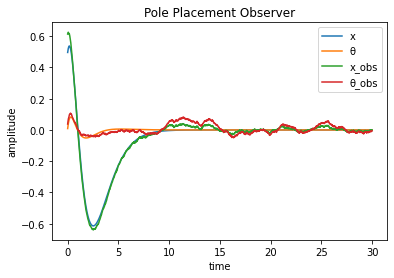

In [0]:
draw(x= x, x_hat = x_hat_pole, t=time, title="Pole Placement Observer")   

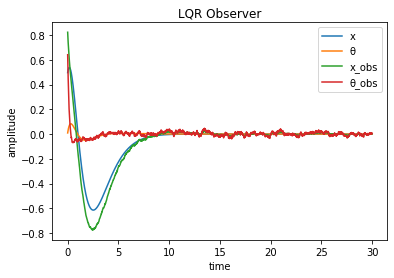

In [0]:
draw(x, x_hat_lqr,  time, "LQR Observer")  

##Results

* LQR Observer has bigger overshoot for x and nearly same overshoot for theta comparing with Pole Placement Observer. 
* Pole Placement Observer is much more sensetive to noize, this is easy to see due to x and theta observed oscilations


#(G) Add White Gaussian Noise to the Dynamics

In [0]:
from numpy.random import randn
# noize_amplitude = 0.0005
noize_amplitude = 0.005
# noize_amplitude = 0.05
time = np.linspace(0,200,20000)


def sensor(x):
  return x+randn()*noize_amplitude


def LTI_Observer_Pole(x_hat,t, u, x):
  return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_pole, dy - np.dot(C, x_hat))
  np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, C).dot(x - x_hat)    


def LTI_Observer_LQR(x_hat, t, u, x):
  return np.dot(A, x_hat) + np.dot(B, u) + np.dot(L_lqr, dy - np.dot(C, x_hat))


x = [np.random.rand(n)]
x_hat_pole = [np.random.rand(n)]
x_hat_lqr = [np.random.rand(n)]

for i in range(1, len(time)):
    cur_time = np.linspace(time[i-1], time[i])
    u = np.dot(P, x[-1])

    x_dot = sensor(odeint(LTI, x[-1], cur_time, args=tuple([u])))
    x.append(x_dot[-1])

    dy = np.dot(C, x[-1]) 
    # noize amplidute was decreased in order it would be able to distinguish at least something in the plots
    dy += randn()*0.05

    x_hat_dot = odeint(LTI_Observer_Pole, x_hat_pole[-1], cur_time, args=tuple([u, dy]))
    x_hat_pole.append(x_hat_dot[-1])

    x_hat_dot = odeint(LTI_Observer_LQR, x_hat_lqr[-1], cur_time, args=tuple([u, dy]))
    x_hat_lqr.append(x_hat_dot[-1])

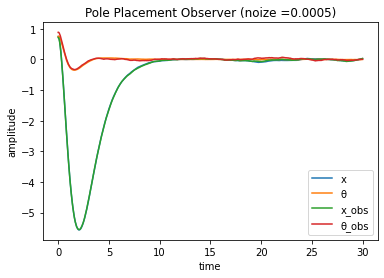

In [0]:
draw(x= x, x_hat = x_hat_pole, t=time, title="Pole Placement Observer (noize =0.0005)")   

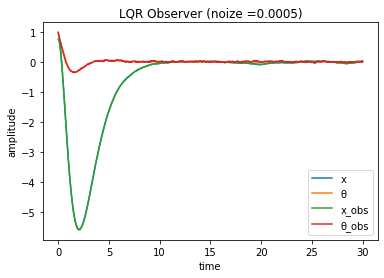

In [0]:
draw(x, x_hat_lqr,  time, "LQR Observer (noize =0.0005)")  

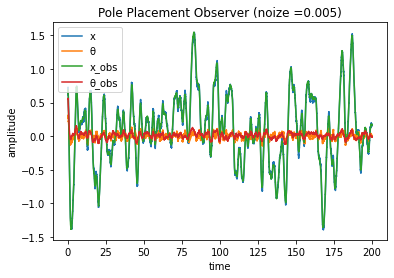

In [0]:
draw(x= x, x_hat = x_hat_pole, t=time, title="Pole Placement Observer (noize =0.005)")   

## Results
* With small error it is not crutial to add error to the output, it crucially increases the overshoot (about 8 times) for both observers, but nearly does not influence on the stabilization time
* However, if the error is too big error may ruin the stability of the system

##(H) Kalman Filter Implementation



In [0]:
def Kalman (n_iter, z):
  sz = (n_iter,)
  Q = 1e-5 # process variance
  xhat=np.zeros(sz)      
  P=np.zeros(sz)         
  xhatminus=np.zeros(sz) 
  Pminus=np.zeros(sz)    
  K=np.zeros(sz)         

  R = 0.1**2 

  # intial guesses
  xhat[0] = 0.0
  P[0] = 1.0

  for k in range(1,n_iter):
      # time update
      xhatminus[k] = xhat[k-1]
      Pminus[k] = P[k-1]+Q

      # measurement update
      K[k] = Pminus[k]/( Pminus[k]+R )
      xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
      P[k] = (1-K[k])*Pminus[k]

  return xhat

# (I) Corectness Check

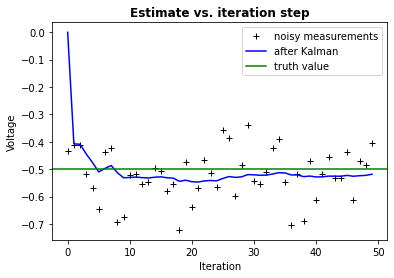

In [0]:
# intial parameters
n_iter = 50
x = -0.5 # truth value
sigma = 0.1
z = np.random.normal(x,sigma,size=(n_iter,)) # observations (normal about x)

xhat = Kalman(n_iter, z)


plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(xhat,'b-',label='after Kalman')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')
plt.show()

#(J) LQG controller with Kalman Filter

LQG is linear combination of LQE(Kalman filter is also a LQE) and LQR, hence, to complete the task we can use Kalman output as control for LQR. From the previous homework we have this functions for LQR.

In [0]:
def for_ode_lqr(x, t):
  x= x.reshape((4,1))
  x_new= np.array(A.dot(x)-(B.dot(k)).dot(x))
  x_new = x_new.reshape((4,))
  return x_new

y0=[0,0,0,0]
res = odeint(for_ode_lqr, y0, time)

So lets change our previuos LQR and calman to work together

In [0]:
# z is currect observation
# initial K=0, Initial guesses xhat=0, P=1
def Kalman_for_lqr(P, xhat, K, z):
  Q = 1e-5 # process variance
  R = 0.1**2 
  # time update
  xhatminus = xhat
  Pminus = P+Q
  # measurement update
  K_new = Pminus/( Pminus+R )
  xhat_new = xhatminus+K_new*(z-xhatminus)
  P_new = (1-K_new)*Pminus


  return P_new, xhat, K_new, xhat_new

In [0]:
# (J) using KF function implement LQG controller
# P, xhat, K are arrays with coefficients 
def new_ode_lqr(turpl, t):
  x = turpl[0:4]
  xhat = turpl[8:12]
  K = turpl[12:16]
  P = turpl[4:8]
  P_0, xhat_0, K_0, y0 = Kalman_for_lqr(P[0],xhat[0],K[0], x[0])
  P_1, xhat_1, K_1, y1 = Kalman_for_lqr(P[1],xhat[1],K[1], x[1])
  P_2, xhat_2, K_2, y2 = Kalman_for_lqr(P[2],xhat[2],K[2], x[2])
  P_3, xhat_3, K_3, y3 = Kalman_for_lqr(P[3],xhat[3],K[3], x[3])

  y = np.array([y0, y1,y2,y3]).reshape((4,1))
  x_new= np.array(A.dot(y)-(B.dot(k)).dot(y))
  x_new = x_new.reshape((4,)).tolist()

  P_new = [P_0, P_1, P_2, P_3]

  xhat_new = [xhat_0, xhat_1, xhat_2, xhat_3]
  K_new = [K_0, K_1, K_2, K_3]
  new_turpl = x_new+P_new+xhat_new+K_new

  return new_turpl 

And lets try our LQG on the inputs fron the previous homework

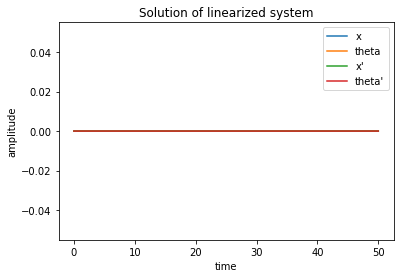

In [0]:
y0=[0,0,0,0]
P_init =1.0
xhat_int= 0.0
K_init = 0.0
time = np.linspace(0,50,5000)
init_coef = [P_init,P_init,P_init,P_init, xhat_int,xhat_int,xhat_int,xhat_int, K_init, K_init,K_init, K_init]
# its length is 16,  it is done because odeint takes only 1-demintional input
init_input = y0+init_coef 
res = odeint(new_ode_lqr, init_input, time) 
res = res[:, :4]
draw_prev(res, time)

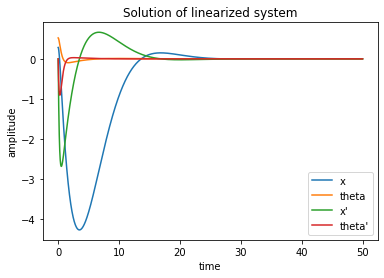

In [0]:
y0 = [0.57/2,pi/6,0,0]
init_input = y0+init_coef 
res = odeint(new_ode_lqr, init_input, time) 
res = res[:, :4]
draw_prev(res, time)

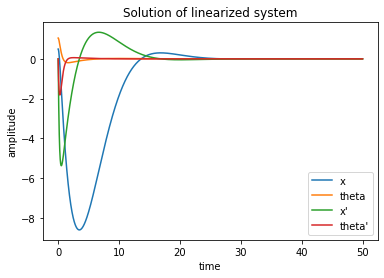

In [0]:
y0 = [sqrt(3)*0.57/2,pi/3,0,0]
init_input = y0+init_coef 
res = odeint(new_ode_lqr, init_input, time) 
res = res[:, :4]
draw_prev(res, time)

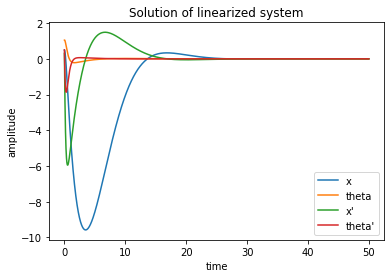

In [0]:
y0 = [sqrt(3)*0.57/2,pi/3,0.3,0.5]
init_input = y0+init_coef 
res = odeint(new_ode_lqr, init_input, time) 
res = res[:, :4]
draw_prev(res, time)

Because we have tried simulating LQG without noize it created results close to LQR results from the previous lab, which is logical because LQE mostly helps us to cope with noize.